# Word clouds of words, hashtags, and @ID

By analyzing about 10000 tweets with "#metoo", downloaded by Twitter rested API method, I generated a wordcloud of 20 most frequent words, hashtags, and @. Bigrams were generated using natural language process, which give me this list of top frequent bigrams:
    sexual, harassment, 237
    sexual, assault, 138
    elizabeth, warren, 116
    clueless, men, 113
    campaign, portrays, 104
    professor, praised, 100
    must, challenge, 80
    men, sexual, 79
    stay, must, 77
    challenge, men, 74
    opinion, clueless, 56
    predator, admitted, 34

Also by analyzing word frequencies, I generated word clouds of most commont words, hashtag, and referred ID. These findings are relatively expected to be associated with sexual harassment topics.Women are potentially the main targeted victims. One surprising thing I found was the highest frequency of @realdonaldtrump (President Trump). Further exploration will be sentiment analysis involved in tweets with high frequency hashtag and @ in this list. 
Another interesting idea is to track the popularity of the most common hashtags through time to see what the #metoo movement has been leading to. 

(-0.5, 999.5, 999.5, -0.5)

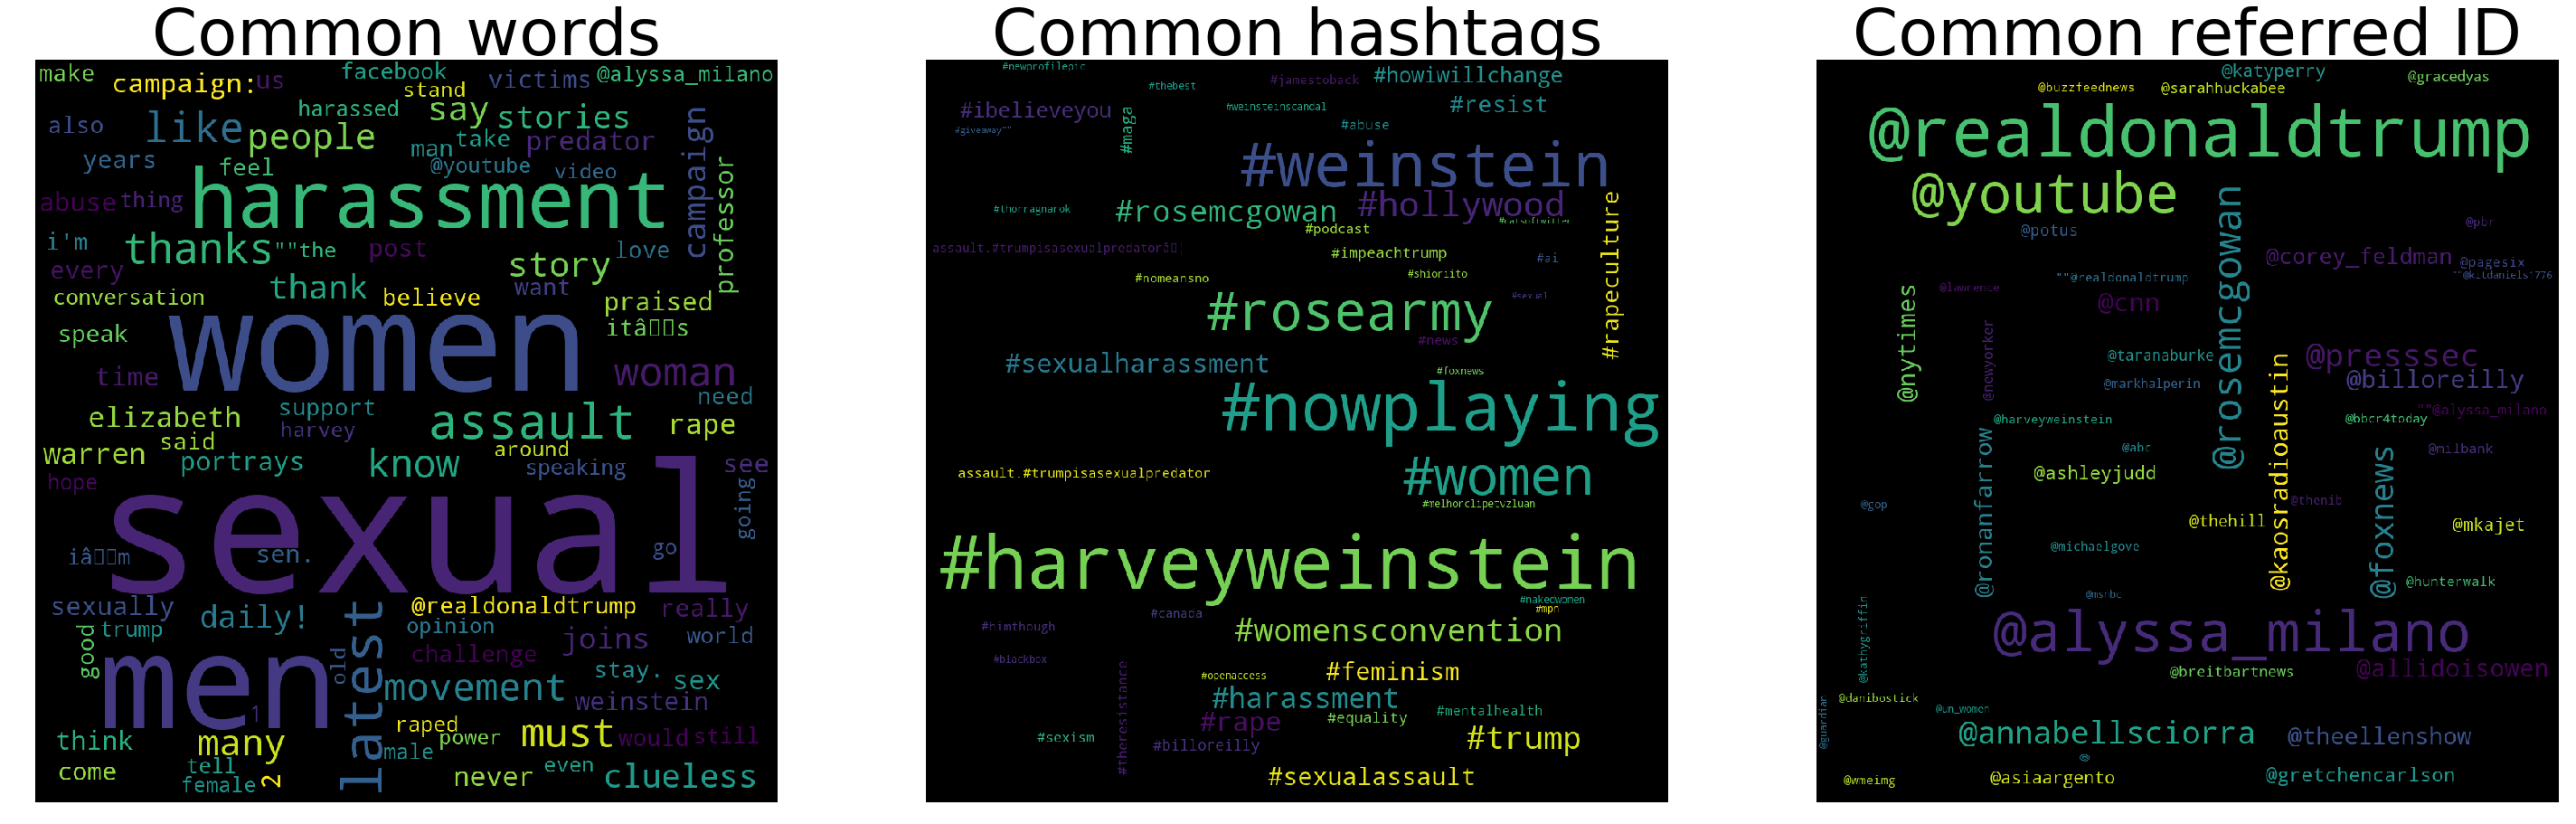

In [30]:
#This is the clouds. Codes can be found in the bottom


# Download Tweets using Twitter API

In [1]:
import tweepy
from tweepy import OAuthHandler


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import datetime

In [3]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import bigrams
import string
#import time

[nltk_data] Downloading package punkt to C:\Users\Uyen
[nltk_data]     Nguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
import operator
from collections import Counter

In [5]:
import wordcloud
from wordcloud import WordCloud

In [10]:
consumer_key = 'Xa7aIbJUcl9v99atEpBdd0qkV'
consumer_secret = '6fP1ekUyWt8tHHJyBpBuegBP2Pyc3QUP2qSMlTnvD57jqlO9Ts'
access_token = '856486397569585152-WVQO5AbHMYBxu5BGwGY3YiWVqXDeM9E'
access_secret = 'jMLawYHvM9h6eLQZAL5v4jMxPkCij1SKkKVmsDPJ9M3Vf'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [19]:
# Create a new csv file to dump data
import csv
csvFile = open('metoo.csv','a')
csvWriter = csv.writer(csvFile)

In [ ]:
#Download tweets to csv file 
c = tweepy.Cursor(api.search,q="metoo",lang='en').items()
while True:
    try:
        tweet = c.next()
        if (not tweet.retweeted) and ('RT @' not in tweet.text):
            csvWriter.writerow([tweet.created_at,
                                tweet.text.encode('utf-8'),
                                tweet.favorite_count, tweet.retweet_count,
                                tweet.id,
                                tweet.lang,
                                tweet.user.screen_name,
                                tweet.user.favourites_count,
                                tweet.user.followers_count])
    except tweepy.TweepError:
        time.sleep(60 * 15)
        continue
    except StopIteration:
        break
    

# Tidy up tweets a bit

In [58]:
#processing tweets to get rid of blank line and to merge lines of same tweet together 
#with open('metoo.csv', 'r') as f:
    #tweet = [line.rstrip() for line in f]
tweet_rm = [item for item in tweet if item != '']
for i in range(0,len(tweet_rm)-2000):
    if '2017' not in tweet_rm[i]:
        tweet_rm[i-1:i+1] = [''.join(tweet_rm[i-1:i+1])]       

In [60]:
#Save processed tweets to a new csv
with open('metoo_tweet.csv','w') as f:
    newfile = csv.writer(f)
    for item in tweet_rm:
        newfile.writerow([item])

# Explore the tweets by counting most common words, hashtags, @, and word co-occurence using bigram

In [6]:
#Create a list of stop words and other words to exclude
punctuation = list(string.punctuation)
letter = list(string.ascii_lowercase)
stop = stopwords.words('english') + punctuation + ['&amp;','rt', 'via','the','i','we','0'] + letter

In [7]:
#Import csv file 
with open('metoo_tweet.csv','r') as f:
    tweet_rm = [line.rstrip() for line in f]

In [9]:
count_word = Counter()
count_bigram = Counter()
count_hashtag = Counter()
count_at = Counter()

for item in tweet_rm:
    item_l = str.lower(item) #convert to lower case
    if len(item_l.split(',')) > 1:
        word = [term for term in item_l.split(',')[1].split() if (term not in stop) and ('#' not in term)]
        bigram = bigrams(word)
        count_word.update(word)
        count_bigram.update(bigram)
        hashtag = [term for term in item_l.split(',')[1].split()
                   if ('#'in term) and ('metoo' not in term)]
        count_hashtag.update( hashtag)
        at = [term for term in item_l.split(',')[1].split()
              if ('@'in term) and ('metoo' not in term)]
        count_at.update(at)
    
print(count_bigram.most_common(20)) #Print the most common bi-words
        

c:\python27\lib\site-packages\ipykernel_launcher.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


[(('sexual', 'harassment'), 237), (('sexual', 'assault'), 138), (('elizabeth', 'warren'), 116), (('clueless', 'men'), 113), (('warren', 'joins'), 105), (('joins', 'campaign:'), 105), (('campaign:', 'portrays'), 104), (('portrays', 'professor'), 104), (('professor', 'praised'), 100), (('sexual', 'predator'), 99), (('sen.', 'elizabeth'), 91), (('must', 'challenge'), 80), (('men', 'sexual'), 79), (('stay.', 'must'), 77), (('challenge', 'men'), 74), (('praised', 'sexual'), 71), (('opinion', 'clueless'), 56), (('harvey', 'weinstein'), 51), (('facebook', 'post'), 46), (('predator', 'admitted'), 34)]


# Create dictionaries for word clouds and plot them.

In [20]:
word = count_word.most_common(100)
word_table = pd.DataFrame()
word_table['name'] = [item[0] for item in word]
word_table['frequency'] = [item[1] for item in word]
word_dic = word_table.set_index('name')['frequency'].to_dict()
del word_dic['get'],word_dic["don't"],word_dic["it's"],word_dic['one'],word_dic['hashtag'],word_dic['""i']

In [27]:
hashtag = count_hashtag.most_common(50)
hashtag_table = pd.DataFrame()
hashtag_table['name'] = [item[0] for item in hashtag]
hashtag_table['frequency'] = [item[1] for item in hashtag]
hash_dic = hashtag_table.set_index('name')['frequency'].to_dict()
del  hash_dic['#']
hash_dic['#harveyweinstein'] = 55 #decrease the frequency of this #, for the purpose of visualization

In [28]:
at_people = count_at.most_common(50)
at_table =  pd.DataFrame()
at_table['name'] = [item[0] for item in at_people]
at_table['frequency'] = [item[1] for item in at_people]
at_dic = at_table.set_index('name')['frequency'].to_dict()
at_dic['@realdonaldtrump'] = 80 #decrease the frequency of this #, for the purpose of visualization

In [ ]:
#Create word clouds for the most frequent terms
wc = WordCloud(width=1000,height=1000, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(word_dic)
wc1 = WordCloud(width=1000,height=1000, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(hash_dic)
wc2 = WordCloud(width=1000,height=1000, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(at_dic)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(50,50))
ax1.imshow(wc,cmap='rainbow')
ax2.imshow(wc1,cmap='viridis')
ax3.imshow(wc2,cmap='viridis')
ax1.set_title('Common words',fontsize=72)
ax2.set_title('Common hashtags',fontsize=72)
ax3.set_title('Common referred ID',fontsize=72)
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")